In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
file_path = "toy_dataset.csv"
df = pd.read_csv(file_path, delimiter=';')

In [6]:
print("Общая информация о данных:")
print(df.info())
display(df.head())

Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   150000 non-null  int64  
 1   City     150000 non-null  object 
 2   Gender   150000 non-null  object 
 3   Age      150000 non-null  int64  
 4   Income   150000 non-null  float64
 5   Illness  150000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB
None


,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [7]:
print("\nПроверка на пропуски:")
print(df.isnull().sum())


Проверка на пропуски:
Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64


In [ ]:
if df.isnull().sum().sum() == 0:
    print("\nПропусков не найдено. Добавим искусственные пропуски.")
    nan_indices = df.sample(frac=0.05, random_state=42).index
    df.loc[nan_indices, 'Income'] = np.nan


Пропусков не найдено. Добавим искусственные пропуски:


In [9]:
print("\nПосле добавления пропусков:")
print(df.isnull().sum())


После добавления пропусков:
Number        0
City          0
Gender        0
Age           0
Income     7500
Illness       0
dtype: int64


In [10]:
df['Income'].fillna(df['Income'].mean(), inplace=True)

C:\Users\shaki\AppData\Local\Temp\ipykernel_19944\2923762628.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].mean(), inplace=True)


In [11]:
scaler = StandardScaler()
df['Income_scaled'] = scaler.fit_transform(df[['Income']])

In [12]:
label_encoder = LabelEncoder()
df['Gender_LabelEncoded'] = label_encoder.fit_transform(df['Gender'])

In [13]:
df_onehot = pd.get_dummies(df, columns=['Gender'], prefix='Gender')

In [14]:
sample_df = df.sample(1000, random_state=42)

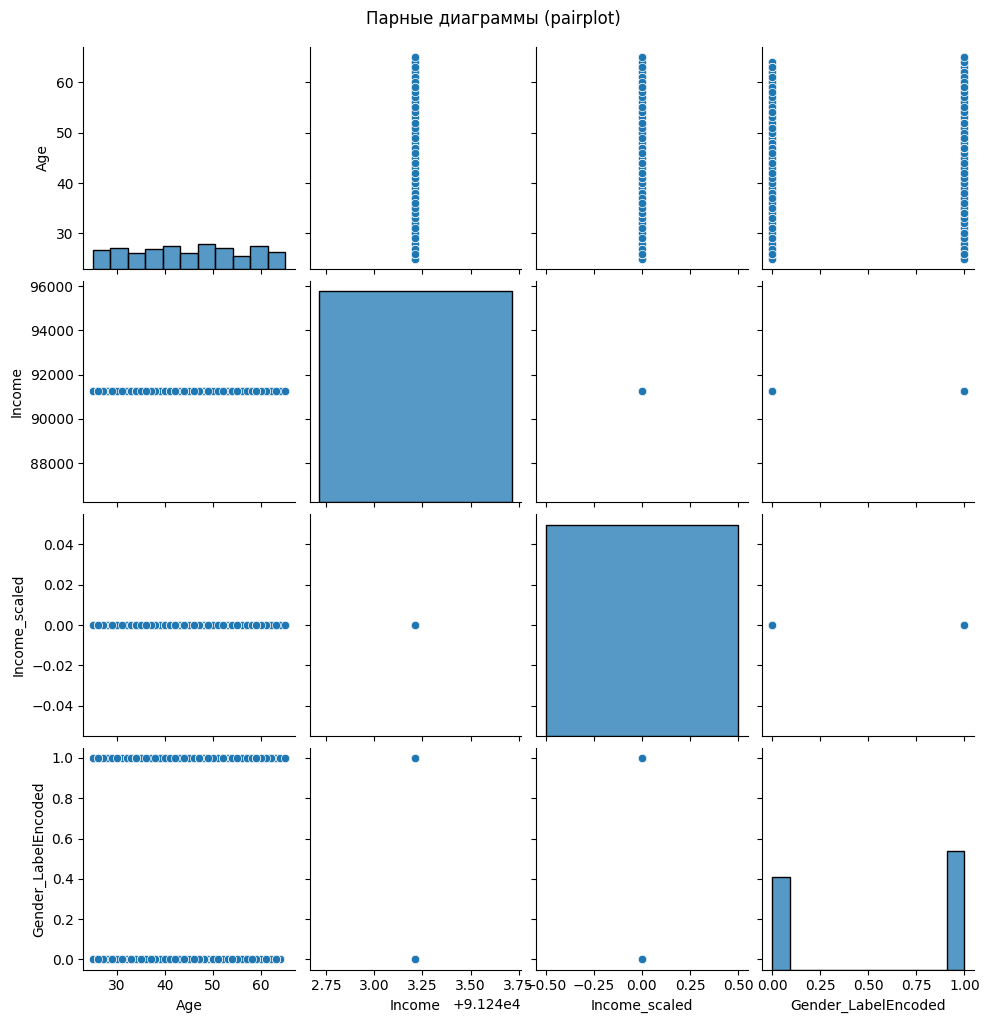

In [15]:
sns.pairplot(sample_df[['Age', 'Income', 'Income_scaled', 'Gender_LabelEncoded']])
plt.suptitle("Парные диаграммы (pairplot)", y=1.02)
plt.show()